/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_49674/736285137.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  return (V / (N**2)) * sum(f)
/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_49674/736285137.py:43: RuntimeWarning: invalid value encountered in scalar multiply
  return (V / (N**2)) * sum(f)
/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_49674/736285137.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(beta*E) + 1 )


time_scf : 0.0時間1.0分36.57392406463623秒


<function matplotlib.pyplot.clf()>

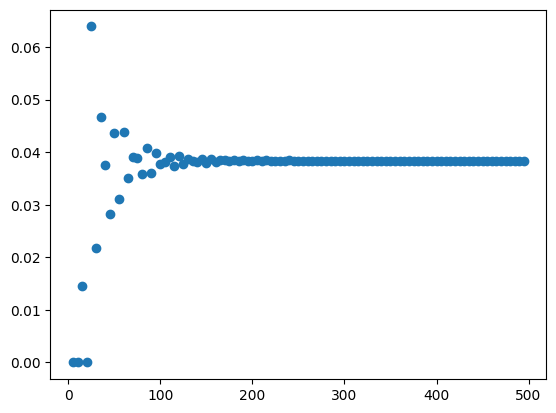

In [14]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time
#from scipy.integrate import quad

###################################################################################################################
##パラメータの調整
n_N = 100
Ns = 500 * (arange(n_N) /n_N)
V, t, mu, gu, n0, n1, n2 =1, 1, 0, 1, 1, 1, 1    # 7.525 #9.21
qs   = np.linspace(0,0.1,n0)  #(np.pi/a)
Bs   = np.linspace(0.0,0.1,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(0.001,0.2,n2)

###################################################################################################################
## gap_eq をdef
def e_k_spin(k1, k2, q, y, B): 
    return 2*t*(np.cos((k1+q/2))+np.cos((k2))) - mu + y * 1/2 * gu * B

def e_k_s(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) + e_k_spin(-1*k1, k2, q, -1, B))/2

def e_k_a(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) - e_k_spin(-1*k1, k2, q, -1, B))/2

def E_k_q(k1, k2, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, gap, q, y, B):
    return E_k_q(k1, k2, gap, q, B) + y * e_k_a(k1, k2, q, B)

def Fermi(beta, E):
    return 1 / (np.exp(beta*E) + 1 )

def func(k1, k2, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, gap, q, 1, B)))/(2*E_k_q(k1, k2, gap, q, B))

def rhs(gap, q, B):
    k1 = -1 * np.pi + 2 * arange(N) * np.pi / (N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)

###################################################################################################################
##ギャップの逐次計算
time_scf_start = time()

ans = []
for i_N in range(n_N):
    ans_0 = []
    for h in range(n0):
        ans0 = []
        for i in range(n1):
            ans1 = []
            for j in range(n2): # それぞれの温度で秩序パラメータを計算
                beta, d0, N = 1/kBTs[j], 100.0, Ns[i_N]
                for k in range(1000): # 収束するまで最大1000回ループ
                    d1 = rhs(d0, qs[h], Bs[i]) 
                    if abs(d1-d0) < 1e-10: break # 収束チェック
                    d0 = d1
                ans1.append([d0, abs(d1-d0), k])
            ans0.append(ans1)
        ans_0.append(ans0)
    ans.append(ans_0)
ans = np.array(ans)

time_scf_finish = time()
time_scf = time_scf_finish - time_scf_start 
print("time_scf : " + str(time_scf//3600) + "時間" + str((time_scf%3600)//60) +"分" + str(time_scf%60) + "秒")

###################################################################################################################

plt.scatter(Ns, ans[:,0,0,0,0])
plt.savefig("output/N_converge_1D_mu_-0.1")
plt.clf

